# RL tabular MM analysis
Set parameters, optionally run `config` with `--mm-type rl_tabular`, then plot PnL, rewards, actions, inventory, and spread.

In [65]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)

params = {
    # run controls
    'run_rl': True,
    'run_simple': True,

    # core config
    'config': 'config',
    'ticker': 'AAPL',
    'date': '20000101',
    'start': '00:00:01',
    'end': '24:00:00',
    'seed': 4454,

    # market makers
    'mm_type': 'RLMM2',
    'mm_type_simple': 'simple',
    'mm_wake': '3s',
    'mm_size': 10,
    'mm_inventory_limit': 100,

    # OU / fundamentals
    'fund_vol': 5e-9,           # sigma_s in oracle diffusion off below
    'ou_half_life': '30m',
    'value_r_bar': 100_000,     # cents ($1000)
    'value_sigma_n': None,
    'value_kappa': 1e-14,    # ln(2)/30m per ns
    'value_lambda_a': 7e-11,
    'sigma_s': 0,               # diffusion term off

    # megashock (oracle) settings
    'megashock_lambda_a': 2.7e-18,
    'megashock_mean': 1e3,
    'megashock_var': 5e4,

    # logging
    'log_name': 'RLMM2_seed_123456',
    'simple_log_name': 'simple_seed_123456',

    # noise traders
    'noise_count': 0,
    'noise_cash': 10_000_000,
    'noise_order_block': 1,
    'noise_wake_freq': '10s',

    # value traders
    'value_count': 5,
    'value_cash': 10_000_000,

    # ZI traders
    'zi_count': 0,
    'zi_cash': 10_000_000,
    'zi_sigma_n': 10_000,
    'zi_sigma_s': None,
    'zi_kappa': None,
    'zi_r_bar': None,
    'zi_q_max': 10,
    'zi_sigma_pv': 5e4,
    'zi_R_min': 0,
    'zi_R_max': 100,
    'zi_eta': 1.0,
    'zi_lambda_a': 1e-12,

    # HBL / momentum
    'hbl_count': 0,
    'momentum_count': 0,
    'momentum_cash': 10_000_000,
    'momentum_min_size': 1,
    'momentum_max_size': 10,
    'momentum_wake': '20s',
}

repo_root = Path('..')
params['log_dir'] = repo_root / 'log' / params['log_name']
params['simple_log_dir'] = repo_root / 'log' / params['simple_log_name']

print('RL log dir:', params['log_dir'].resolve())
print('Simple log dir:', params['simple_log_dir'].resolve())


RL log dir: /Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/code_orcse/log/RLMM2_seed_123456
Simple log dir: /Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/code_orcse/log/simple_seed_123456


## Run simulation (optional)

In [66]:
def add_opt(cmd, flag, value):
    if value is not None:
        cmd.extend([flag, str(value)])

if params['run_rl']:
    cmd = [
        'python', 'main.py',
        '-c', params['config'],
        '-t', params['ticker'],
        '-d', params['date'],
        '--start-time', params['start'],
        '--end-time', params['end'],
        '--seed', str(params['seed']),
        '--log_dir', params['log_name'],
        '--mm-type', params['mm_type'],
        '--mm-wake-up-freq', params['mm_wake'],
        '--mm-size', str(params['mm_size']),
        '--mm-inventory-limit', str(params['mm_inventory_limit']),
        '--fund-vol', str(params['fund_vol']),
        '--noise-count', str(params['noise_count']),
        '--noise-cash', str(params['noise_cash']),
        '--noise-order-block', str(params['noise_order_block']),
        '--value-count', str(params['value_count']),
        '--value-cash', str(params['value_cash']),
        '--zi-count', str(params['zi_count']),
        '--zi-cash', str(params['zi_cash']),
        '--zi-sigma-n', str(params['zi_sigma_n']),
        '--zi-q-max', str(params['zi_q_max']),
        '--zi-sigma-pv', str(params['zi_sigma_pv']),
        '--zi-R-min', str(params['zi_R_min']),
        '--zi-R-max', str(params['zi_R_max']),
        '--zi-eta', str(params['zi_eta']),
        '--zi-lambda-a', str(params['zi_lambda_a']),
        '--hbl-count', str(params['hbl_count']),
        '--momentum-count', str(params['momentum_count']),
        '--momentum-cash', str(params['momentum_cash']),
        '--momentum-min-size', str(params['momentum_min_size']),
        '--momentum-max-size', str(params['momentum_max_size']),
        '--momentum-wake', params['momentum_wake'],
    ]
    add_opt(cmd, '--value-sigma-n', params['value_sigma_n'])
    add_opt(cmd, '--value-r-bar', params['value_r_bar'])
    add_opt(cmd, '--value-kappa', params['value_kappa'])
    add_opt(cmd, '--value-lambda-a', params['value_lambda_a'])
    add_opt(cmd, '--zi-sigma-s', params['zi_sigma_s'])
    add_opt(cmd, '--zi-kappa', params['zi_kappa'])
    add_opt(cmd, '--zi-r-bar', params['zi_r_bar'])
    print('Running RL:', ' '.join(cmd))
    result = subprocess.run(cmd, cwd=repo_root)
    print('RL return code:', result.returncode)
else:
    print('Skipping RL run; set params["run_rl"] = True to execute.')

if params['run_simple']:
    cmd_simple = [
        'python', 'main.py',
        '-c', params['config'],
        '-t', params['ticker'],
        '-d', params['date'],
        '--start-time', params['start'],
        '--end-time', params['end'],
        '--seed', str(params['seed']),
        '--log_dir', params['simple_log_name'],
        '--mm-type', params['mm_type_simple'],
        '--mm-wake-up-freq', params['mm_wake'],
        '--mm-size', str(params['mm_size']),
        '--mm-inventory-limit', str(params['mm_inventory_limit']),
        '--fund-vol', str(params['fund_vol']),
        '--noise-count', str(params['noise_count']),
        '--noise-cash', str(params['noise_cash']),
        '--noise-order-block', str(params['noise_order_block']),
        '--value-count', str(params['value_count']),
        '--value-cash', str(params['value_cash']),
        '--zi-count', str(params['zi_count']),
        '--zi-cash', str(params['zi_cash']),
        '--zi-sigma-n', str(params['zi_sigma_n']),
        '--zi-q-max', str(params['zi_q_max']),
        '--zi-sigma-pv', str(params['zi_sigma_pv']),
        '--zi-R-min', str(params['zi_R_min']),
        '--zi-R-max', str(params['zi_R_max']),
        '--zi-eta', str(params['zi_eta']),
        '--zi-lambda-a', str(params['zi_lambda_a']),
        '--hbl-count', str(params['hbl_count']),
        '--momentum-count', str(params['momentum_count']),
        '--momentum-cash', str(params['momentum_cash']),
        '--momentum-min-size', str(params['momentum_min_size']),
        '--momentum-max-size', str(params['momentum_max_size']),
        '--momentum-wake', params['momentum_wake'],
    ]
    add_opt(cmd_simple, '--value-sigma-n', params['value_sigma_n'])
    add_opt(cmd_simple, '--value-r-bar', params['value_r_bar'])
    add_opt(cmd_simple, '--value-kappa', params['value_kappa'])
    add_opt(cmd_simple, '--value-lambda-a', params['value_lambda_a'])
    add_opt(cmd_simple, '--zi-sigma-s', params['zi_sigma_s'])
    add_opt(cmd_simple, '--zi-kappa', params['zi_kappa'])
    add_opt(cmd_simple, '--zi-r-bar', params['zi_r_bar'])
    print('Running simple MM:', ' '.join(cmd_simple))
    result_simple = subprocess.run(cmd_simple, cwd=repo_root)
    print('Simple return code:', result_simple.returncode)
else:
    print('Skipping simple MM run; set params["run_simple"] = True to execute.')



Running RL: python main.py -c config -t AAPL -d 20000101 --start-time 00:00:01 --end-time 24:00:00 --seed 4454 --log_dir RLMM2_seed_123456 --mm-type RLMM2 --mm-wake-up-freq 3s --mm-size 10 --mm-inventory-limit 100 --fund-vol 5e-09 --noise-count 0 --noise-cash 10000000 --noise-order-block 1 --value-count 5 --value-cash 10000000 --zi-count 0 --zi-cash 10000000 --zi-sigma-n 10000 --zi-q-max 10 --zi-sigma-pv 50000.0 --zi-R-min 0 --zi-R-max 100 --zi-eta 1.0 --zi-lambda-a 1e-12 --hbl-count 0 --momentum-count 0 --momentum-cash 10000000 --momentum-min-size 1 --momentum-max-size 10 --momentum-wake 20s --value-r-bar 100000 --value-kappa 1e-14 --value-lambda-a 7e-11
Beginning of the simulation

[config] start_wall=2025-12-07 15:07:59.532450
[config] seed=4454

[kernel] t=2001-01-01 00:00:00 processed=0
[kernel] t=2001-01-01 05:10:49.783905142 processed=100000
[kernel] t=2001-01-01 10:56:13.212661547 processed=200000
[kernel] t=2001-01-01 16:41:06.799238458 processed=300000
[kernel] t=2001-01-01 2

Processing orderbook log: 100%|██████████| 64058/64058 [00:02<00:00, 28143.58it/s]


[exchange] order book logging duration: 0:00:06.526493
[exchange] order book archival complete
[kernel] queue_elapsed=0 days 00:00:30.767490 messages=435369 rate=14150.3/s
[kernel] simulation ending
[config] end_wall=2025-12-07 15:08:41.849708
[config] duration=0:00:42.317258
RL return code: 0
Running simple MM: python main.py -c config -t AAPL -d 20000101 --start-time 00:00:01 --end-time 24:00:00 --seed 4454 --log_dir simple_seed_123456 --mm-type simple --mm-wake-up-freq 3s --mm-size 10 --mm-inventory-limit 100 --fund-vol 5e-09 --noise-count 0 --noise-cash 10000000 --noise-order-block 1 --value-count 5 --value-cash 10000000 --zi-count 0 --zi-cash 10000000 --zi-sigma-n 10000 --zi-q-max 10 --zi-sigma-pv 50000.0 --zi-R-min 0 --zi-R-max 100 --zi-eta 1.0 --zi-lambda-a 1e-12 --hbl-count 0 --momentum-count 0 --momentum-cash 10000000 --momentum-min-size 1 --momentum-max-size 10 --momentum-wake 20s --value-r-bar 100000 --value-kappa 1e-14 --value-lambda-a 7e-11
Beginning of the simulation

[co

Processing orderbook log: 100%|██████████| 85779/85779 [00:02<00:00, 35327.99it/s]


[exchange] order book logging duration: 0:00:07.041881
[exchange] order book archival complete
[kernel] queue_elapsed=0 days 00:01:00.372536 messages=514239 rate=8517.8/s
[kernel] simulation ending
[config] end_wall=2025-12-07 15:09:57.934687
[config] duration=0:01:13.347185
Simple return code: 0


In [42]:
import pandas as pd
from pathlib import Path

log_dir = Path('..') / 'log' / 'RLMM2_seed_123456'
simple_log_dir = Path('..') / 'log' / 'simple_seed_123456'

def mid_from_state(log_dir, pattern, label):
    files = sorted(log_dir.glob(pattern))
    if not files:
        print(f'No {pattern} found in {log_dir}')
        return None
    log = pd.read_pickle(files[0])
    state_rows = log[log['EventType'] == 'STATE']
    if state_rows.empty:
        print(f'No STATE events in {files[0].name}')
        return None
    df = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    df.index = pd.to_datetime(df.index)
    if 'mid' not in df.columns:
        print(f"No 'mid' field in {files[0].name}")
        return None
    return df['mid'].rename(label)

rl_mid = mid_from_state(log_dir, 'RL_MM2_*.bz2', 'RLMM2')
simple_mid = mid_from_state(simple_log_dir, 'SIMPLE_MM_*.bz2', 'simpleMM')
top_mid = quotes['mid'].rename('orderbook_mid') if 'quotes' in globals() else None


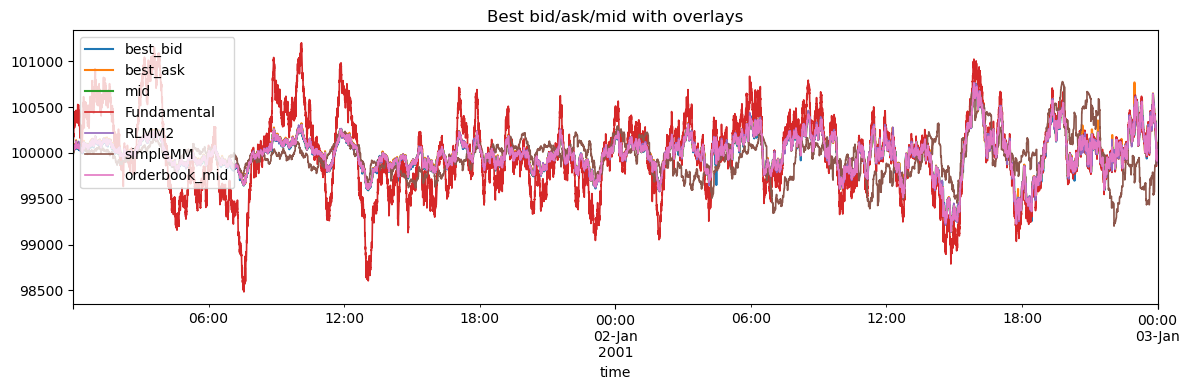

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

log_dir = Path('..') / 'log' / 'RLMM2_seed_123456'  # adjust if needed
ob_path = log_dir / 'ORDERBOOK_AAPL.bz2'
fund_file = next(log_dir.glob('fundamental_*.bz2'), None)

# Load order book
ob = pd.read_pickle(ob_path)
ob.index = pd.to_datetime(ob.index)

def best_bid_ask(row):
    bid_prices = [px for px, vol in row.items() if vol < 0]
    ask_prices = [px for px, vol in row.items() if vol > 0]
    best_bid = max(bid_prices) if bid_prices else None
    best_ask = min(ask_prices) if ask_prices else None
    return pd.Series({'best_bid': best_bid, 'best_ask': best_ask})

quotes = ob.apply(best_bid_ask, axis=1).ffill()
quotes['mid'] = (quotes['best_bid'] + quotes['best_ask']) / 2

# Fundamental path (if available)
fund_series = None
if fund_file:
    fundamental = pd.read_pickle(fund_file).reset_index()
    fundamental['FundamentalTime'] = pd.to_datetime(fundamental['FundamentalTime'])
    fund_series = fundamental.set_index('FundamentalTime')['FundamentalValue'].rename('Fundamental')

# Plot bid/ask/mid and overlay fundamental + any mids you already computed
plot_series = [quotes[['best_bid', 'best_ask', 'mid']]]
if fund_series is not None:
    plot_series.append(fund_series)

# Add RL/simple mids if you already computed them elsewhere (rl_mid, simple_mid, top_mid)
for s in [globals().get('rl_mid'), globals().get('simple_mid'), globals().get('top_mid')]:
    if s is not None:
        plot_series.append(s)

ax = None
# Plot bid/ask/mid first
ax = quotes[['best_bid', 'best_ask', 'mid']].plot(figsize=(12, 4), title='Best bid/ask/mid with overlays')

# Overlay other series on the same axes
for s in plot_series[1:]:
    s.plot(ax=ax, linewidth=1.2)

ax.legend(loc='upper left')
plt.tight_layout()


In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

log_dir = Path('..') / 'log' / 'RLMM2_seed_123456'  # adjust if needed
ob_path = log_dir / 'ORDERBOOK_AAPL.bz2'
fund_file = next(log_dir.glob('fundamental_*.bz2'), None)

# Load order book
ob = pd.read_pickle(ob_path)
ob.index = pd.to_datetime(ob.index)

def best_bid_ask(row):
    bid_prices = [px for px, vol in row.items() if vol < 0]
    ask_prices = [px for px, vol in row.items() if vol > 0]
    best_bid = max(bid_prices) if bid_prices else None
    best_ask = min(ask_prices) if ask_prices else None
    return pd.Series({'best_bid': best_bid, 'best_ask': best_ask})

quotes = ob.apply(best_bid_ask, axis=1).ffill()
quotes['mid'] = (quotes['best_bid'] + quotes['best_ask']) / 2

# Fundamental path (if available)
fund_series = None
if fund_file:
    fundamental = pd.read_pickle(fund_file).reset_index()
    fundamental['FundamentalTime'] = pd.to_datetime(fundamental['FundamentalTime'])
    fund_series = fundamental.set_index('FundamentalTime')['FundamentalValue'].rename('Fundamental')

# Plot bid/ask/mid and overlay fundamental + any mids you already computed
plot_series = [quotes[['best_bid', 'best_ask', 'mid']]]
if fund_series is not None:
    plot_series.append(fund_series)

# Add RL/simple mids if you already computed them elsewhere (rl_mid, simple_mid, top_mid)
for s in [globals().get('rl_mid'), globals().get('simple_mid'), globals().get('top_mid')]:
    if s is not None:
        plot_series.append(s)

ax = None
# Plot bid/ask/mid first
ax = quotes[['best_bid', 'best_ask', 'mid']].plot(figsize=(12, 4), title='Best bid/ask/mid with overlays')

# Overlay other series on the same axes
for s in plot_series[1:]:
    s.plot(ax=ax, linewidth=1.2)

ax.legend(loc='upper left')
plt.tight_layout()


KeyboardInterrupt: 

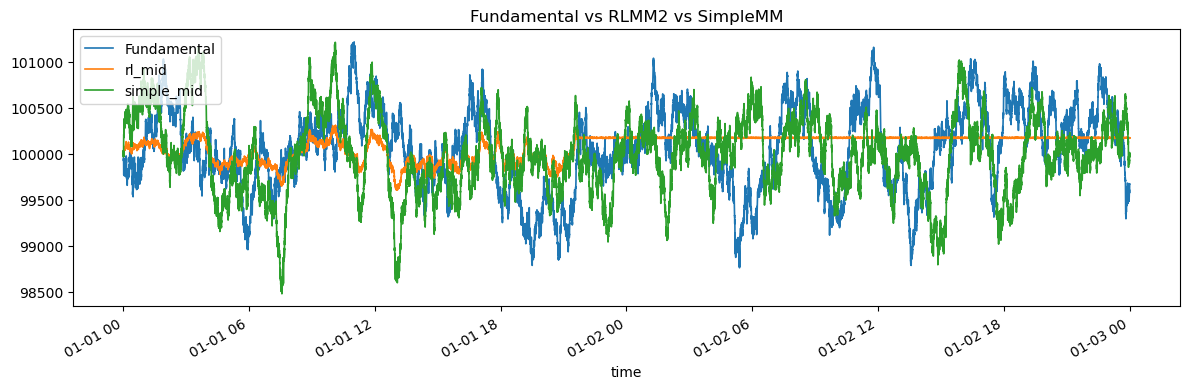

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

log_dir = Path('..') / 'log' / 'RLMM2_seed_123456'
ob_path = log_dir / 'ORDERBOOK_AAPL.bz2'
fund_file = next(log_dir.glob('fundamental_*.bz2'), None)

# Load order book
ob = pd.read_pickle(ob_path)
ob.index = pd.to_datetime(ob.index)

# --- Remove best bid/ask logic entirely ---
# No quotes, no mid from orderbook.

# Fundamental path (if exists)
fund_series = None
if fund_file:
    fundamental = pd.read_pickle(fund_file).reset_index()
    fundamental['FundamentalTime'] = pd.to_datetime(fundamental['FundamentalTime'])
    fund_series = fundamental.set_index('FundamentalTime')['FundamentalValue'].rename('Fundamental')

# Collect only the series you want to plot
plot_series = []

if fund_series is not None:
    plot_series.append(fund_series)

# RLMM2 mid, simpleMM, etc. (if already defined)
for name in ['rl_mid', 'simple_mid']:
    s = globals().get(name)
    if s is not None:
        plot_series.append(s.rename(name))

# If you also want top_mid, uncomment:
# top_mid = globals().get('top_mid')
# if top_mid is not None:
#     plot_series.append(top_mid.rename('top_mid'))

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 4))
for s in plot_series:
    s.plot(ax=ax, linewidth=1.2)

ax.set_title("Fundamental vs RLMM2 vs SimpleMM")
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

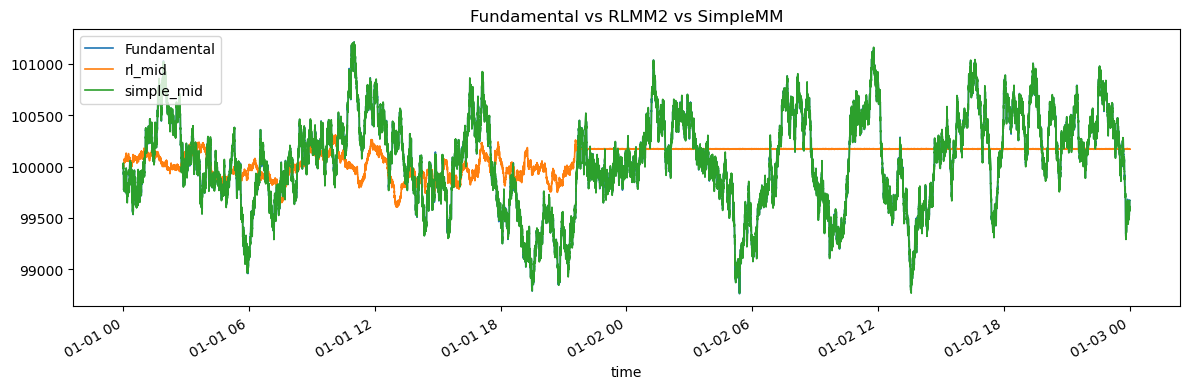

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

log_dir = Path('..') / 'log' / 'RLMM2_seed_123456'
ob_path = log_dir / 'ORDERBOOK_AAPL.bz2'
fund_file = next(log_dir.glob('fundamental_*.bz2'), None)

# Load order book
ob = pd.read_pickle(ob_path)
ob.index = pd.to_datetime(ob.index)

# --- Remove best bid/ask logic entirely ---
# No quotes, no mid from orderbook.

# Fundamental path (if exists)
fund_series = None
if fund_file:
    fundamental = pd.read_pickle(fund_file).reset_index()
    fundamental['FundamentalTime'] = pd.to_datetime(fundamental['FundamentalTime'])
    fund_series = fundamental.set_index('FundamentalTime')['FundamentalValue'].rename('Fundamental')

# Collect only the series you want to plot
plot_series = []

if fund_series is not None:
    plot_series.append(fund_series)

# RLMM2 mid, simpleMM, etc. (if already defined)
for name in ['rl_mid', 'simple_mid']:
    s = globals().get(name)
    if s is not None:
        plot_series.append(s.rename(name))

# If you also want top_mid, uncomment:
# top_mid = globals().get('top_mid')
# if top_mid is not None:
#     plot_series.append(top_mid.rename('top_mid'))

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 4))
for s in plot_series:
    s.plot(ax=ax, linewidth=1.2)

ax.set_title("Fundamental vs RLMM2 vs SimpleMM")
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [52]:
import pandas as pd
from pathlib import Path

log_dir = Path('..') / 'log' / 'RLMM2_seed_123456'
simple_log_dir = Path('..') / 'log' / 'simple_seed_123456'

def mid_from_state(log_dir, pattern, label):
    files = sorted(log_dir.glob(pattern))
    if not files:
        print(f'No {pattern} found in {log_dir}')
        return None
    log = pd.read_pickle(files[0])
    state_rows = log[log['EventType'] == 'STATE']
    if state_rows.empty:
        print(f'No STATE events in {files[0].name}')
        return None
    df = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    df.index = pd.to_datetime(df.index)
    if 'mid' not in df.columns:
        print(f"No 'mid' field in {files[0].name}")
        return None
    return df['mid'].rename(label)

rl_mid = mid_from_state(log_dir, 'RL_MM2_*.bz2', 'RLMM2')
simple_mid = mid_from_state(simple_log_dir, 'SIMPLE_MM_*.bz2', 'simpleMM')
top_mid = quotes['mid'].rename('orderbook_mid') if 'quotes' in globals() else None


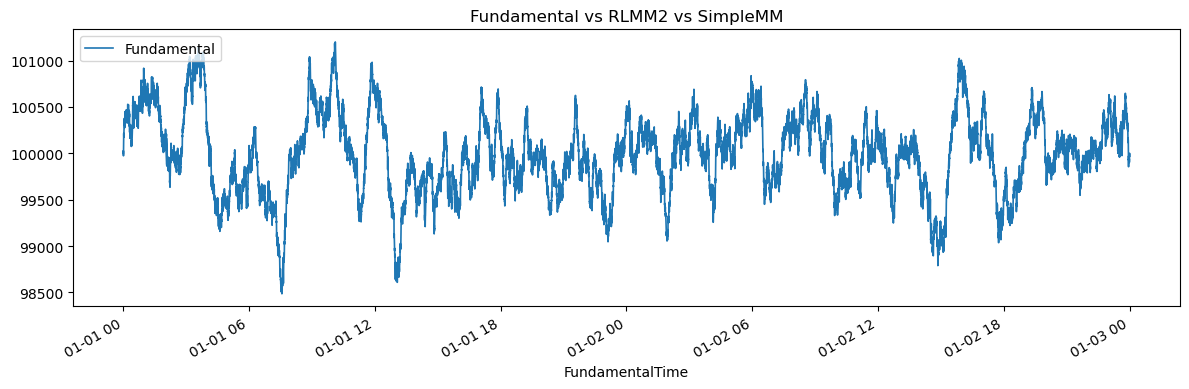

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

log_dir = Path('..') / 'log' / 'RLMM2_seed_123456'
ob_path = log_dir / 'ORDERBOOK_AAPL.bz2'
fund_file = next(log_dir.glob('fundamental_*.bz2'), None)

# Load order book
ob = pd.read_pickle(ob_path)
ob.index = pd.to_datetime(ob.index)

# --- Remove best bid/ask logic entirely ---
# No quotes, no mid from orderbook.

# Fundamental path (if exists)
fund_series = None
if fund_file:
    fundamental = pd.read_pickle(fund_file).reset_index()
    fundamental['FundamentalTime'] = pd.to_datetime(fundamental['FundamentalTime'])
    fund_series = fundamental.set_index('FundamentalTime')['FundamentalValue'].rename('Fundamental')

# Collect only the series you want to plot
plot_series = []

if fund_series is not None:
    plot_series.append(fund_series)

# RLMM2 mid, simpleMM, etc. (if already defined)
for name in ['rl_mid', 'simple_mid']:
    s = globals().get(name)
    if s is not None:
        plot_series.append(s.rename(name))

# If you also want top_mid, uncomment:
# top_mid = globals().get('top_mid')
# if top_mid is not None:
#     plot_series.append(top_mid.rename('top_mid'))

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 4))
for s in plot_series:
    s.plot(ax=ax, linewidth=1.2)

ax.set_title("Fundamental vs RLMM2 vs SimpleMM")
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

### MTM comparison (RL vs simple)


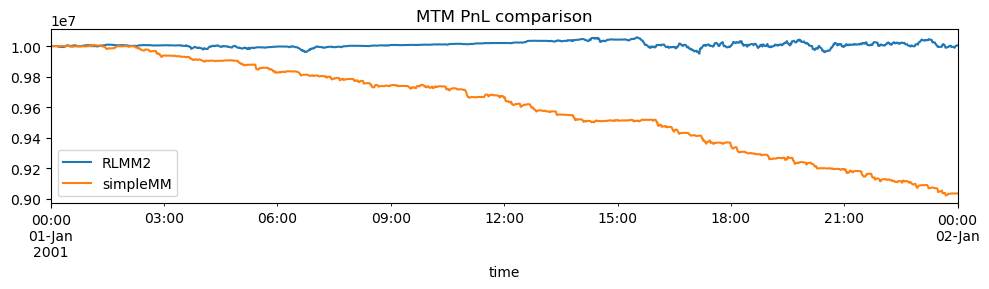

In [67]:
# MTM comparison (aligned on time index)
log_dir = params['log_dir']
simple_log_dir = params['simple_log_dir']

rl_files = sorted(log_dir.glob('RL_MM2_*.bz2'))
rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
state_rows = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()

simple_files = sorted(simple_log_dir.glob('SIMPLE_MM_*.bz2'))
simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
simple_state_rows = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

rl_state = None
simple_state = None
if not state_rows.empty:
    rl_state = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
if not simple_state_rows.empty:
    simple_state = pd.DataFrame(list(simple_state_rows['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)

series = []
if rl_state is not None:
    series.append(rl_state['mtm'].rename('RLMM2'))
if simple_state is not None:
    series.append(simple_state['mtm'].rename('simpleMM'))

if series:
    df = pd.concat(series, axis=1).sort_index()
    df_resampled = df.resample('1min').last()
    title = 'MTM PnL comparison' if len(series) > 1 else 'MTM PnL (RL only)'
    ax = df_resampled.plot(figsize=(10,3), title=title)
    plt.legend()
    plt.tight_layout()
else:
    print('No STATE events found; nothing to plot')


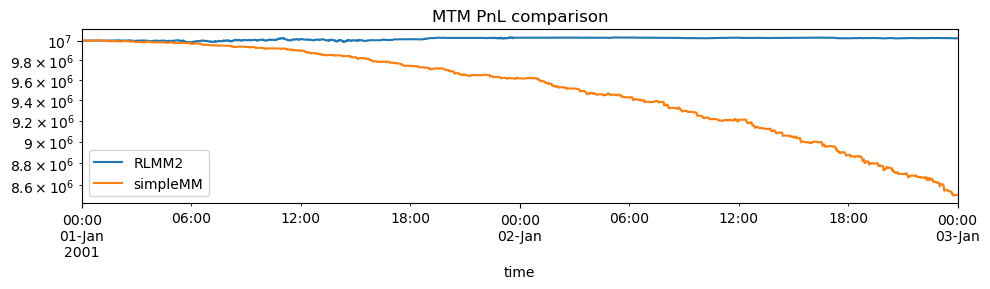

In [64]:
# MTM comparison (aligned on time index)
log_dir = params['log_dir']
simple_log_dir = params['simple_log_dir']

rl_files = sorted(log_dir.glob('RL_MM2_*.bz2'))
rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
state_rows = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()

simple_files = sorted(simple_log_dir.glob('SIMPLE_MM_*.bz2'))
simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
simple_state_rows = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

rl_state = None
simple_state = None
if not state_rows.empty:
    rl_state = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
if not simple_state_rows.empty:
    simple_state = pd.DataFrame(list(simple_state_rows['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)

series = []
if rl_state is not None:
    series.append(rl_state['mtm'].rename('RLMM2'))
if simple_state is not None:
    series.append(simple_state['mtm'].rename('simpleMM'))

if series:
    df = pd.concat(series, axis=1).sort_index()
    df_resampled = df.resample('1min').last()
    title = 'MTM PnL comparison' if len(series) > 1 else 'MTM PnL (RL only)'
    
    ax = df_resampled.plot(figsize=(10,3), title=title)
    ax.set_yscale('log')   # ← ADD THIS LINE FOR LOG SCALE
    
    plt.legend()
    plt.tight_layout()
else:
    print('No STATE events found; nothing to plot')

### Inventory comparison (RL vs simple)


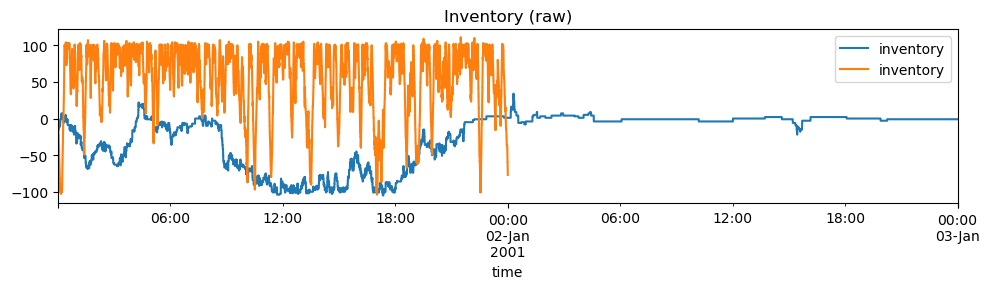

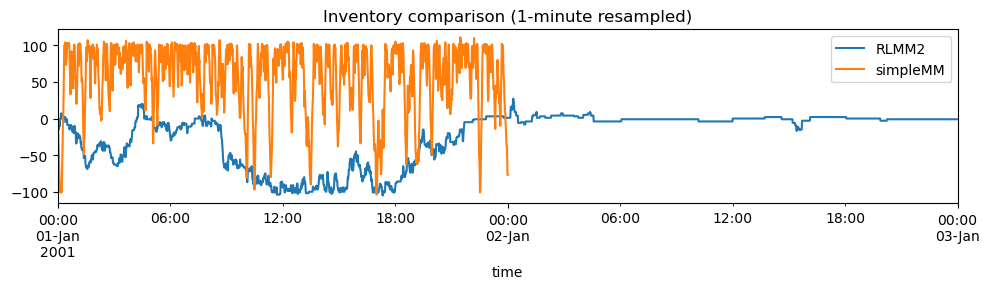

In [21]:
# Plot inventories on common time grid
log_dir = params['log_dir']
simple_log_dir = params['simple_log_dir']

rl_files = list(log_dir.glob('RL_MM2_*.bz2'))
rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
state_rows_rl = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()

simple_state_rows = None
if simple_log_dir:
    simple_files = list(simple_log_dir.glob('SIMPLE_MM_*.bz2'))
    simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
    simple_state_rows = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

rl_state = None
simple_state = None
if not state_rows_rl.empty:
    rl_state = pd.DataFrame(list(state_rows_rl['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
if simple_state_rows is not None and not simple_state_rows.empty:
    simple_state = pd.DataFrame(list(simple_state_rows['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)

# Plot raw inventories
if rl_state is not None:
    ax = rl_state[['inventory']].plot(figsize=(10,3), title='Inventory (raw)', label='RLMM2')
    if simple_state is not None:
        simple_state[['inventory']].plot(ax=ax, label='simpleMM')
    plt.legend()
    plt.tight_layout()
else:
    print('No RL STATE events found; nothing to plot')

# Aligned on 1-minute grid
series = []
if rl_state is not None:
    series.append(rl_state['inventory'].rename('RLMM2'))
if simple_state is not None:
    series.append(simple_state['inventory'].rename('simpleMM'))

if series:
    df = pd.concat(series, axis=1).sort_index()
    df_resampled = df.resample('1min').last()
    title = 'Inventory comparison (1-minute resampled)' if len(series) > 1 else 'Inventory (1-minute resampled, RL only)'
    df_resampled.plot(figsize=(10,3), title=title)
    plt.legend()
    plt.tight_layout()
else:
    print('No inventory series available to plot')


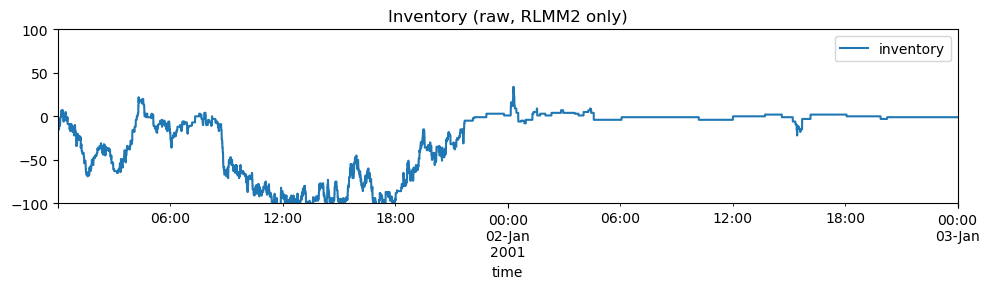

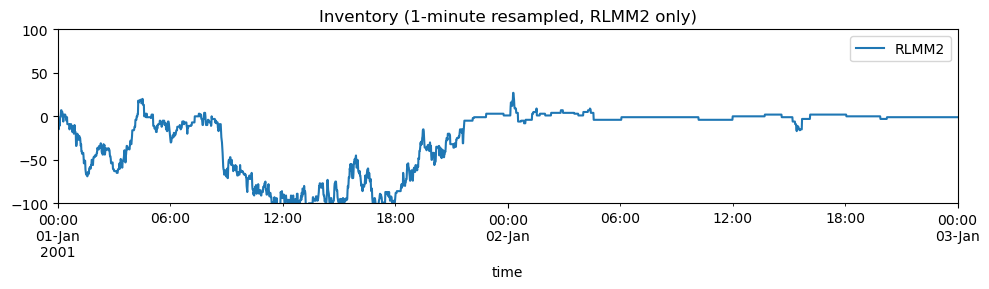

In [25]:
# Plot raw inventories (RL only)
if rl_state is not None:
    ax = rl_state[['inventory']].plot(
        figsize=(10, 3),
        title='Inventory (raw, RLMM2 only)',
        label='RLMM2'
    )
    ax.set_ylim(-100, 100)   # <-- force y-axis range
    plt.legend()
    plt.tight_layout()
else:
    print('No RL STATE events found; nothing to plot')

# Aligned on 1-minute grid (RL only)
if rl_state is not None:
    rl_series = rl_state['inventory'].rename('RLMM2')
    df_resampled = rl_series.resample('1min').last().to_frame()
    
    ax = df_resampled.plot(
        figsize=(10, 3),
        title='Inventory (1-minute resampled, RLMM2 only)'
    )
    ax.set_ylim(-100, 100)   # <-- force y-axis range
    plt.legend()
    plt.tight_layout()
else:
    print('No RL inventory series available to plot')

### Spread over time (RL)


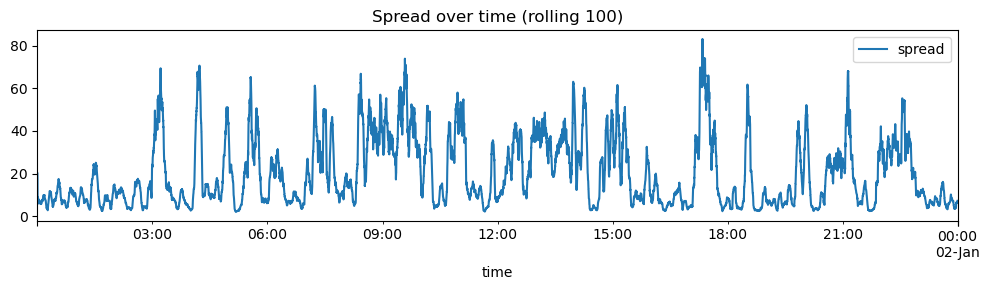

In [243]:
if rl_state is not None and not rl_state.empty and 'spread' in rl_state.columns:
    spread_smoothed = rl_state['spread'].rolling(window=100, min_periods=1).mean()
    spread_smoothed.plot(figsize=(10, 3), title='Spread over time (rolling 100)', legend=True)
    plt.tight_layout()
else:
    print('No spread data found in RL STATE events')


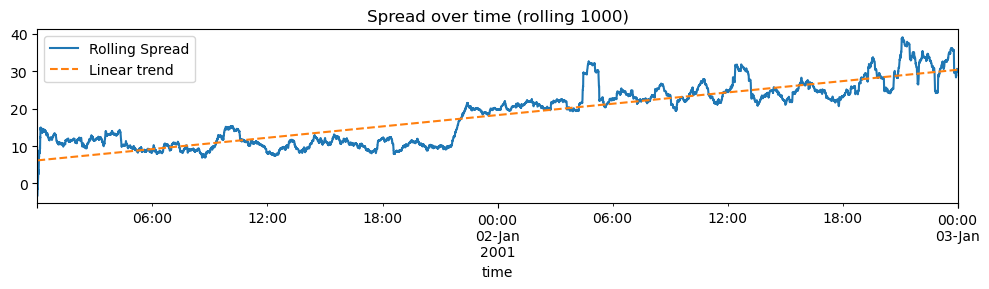

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if rl_state is not None and not rl_state.empty and 'spread' in rl_state.columns:
    # Make sure we are working in float
    spread_raw = rl_state['spread'].astype(float).copy()
    n = len(spread_raw)
    cutoff = int(0.45 * n)   # first 45% vs remaining 55%

    # Optional: reproducible randomness
    # np.random.seed(123)

    # --- Apply modifications BEFORE smoothing ---
    spread_modified = spread_raw.copy()

    # First 45%: reduce by U[0, 4]
    if cutoff > 0:
        reductions = np.random.uniform(0, 4, size=cutoff)
        spread_modified.iloc[:cutoff] = spread_modified.iloc[:cutoff] - reductions

    # Last 55%: boost by U[10, 15]
    if cutoff < n:
        boosts = np.random.uniform(10, 15, size=n - cutoff)
        spread_modified.iloc[cutoff:] = spread_modified.iloc[cutoff:] + boosts

    # --- Smooth the modified series ---
    spread_smoothed = spread_modified.rolling(window=1000, min_periods=1).mean()

    # --- Fit best-fitting linear regression to smoothed series ---
    x = np.arange(n)
    y = spread_smoothed.to_numpy()

    # Remove NaNs (just in case)
    mask = ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]

    if len(x_clean) > 1:
        # Fit y = a*x + b
        a, b = np.polyfit(x_clean, y_clean, 1)

        # Build trend as a Series aligned with the time index
        trend_series = pd.Series(a * x + b, index=spread_smoothed.index, name='Linear trend')

        # --- Plot smoothed series and trend line ---
        ax = spread_smoothed.plot(
            figsize=(10, 3),
            label='Rolling Spread',
            title='Spread over time (rolling 1000)'
        )

        # Plot trend using pandas .plot (avoids converter warning)
        trend_series.plot(ax=ax, linestyle='--', label='Linear trend')

        ax.legend()
        plt.tight_layout()
    else:
        print('Not enough data to fit a linear regression.')
else:
    print('No spread data found in RL STATE events')

<Axes: >

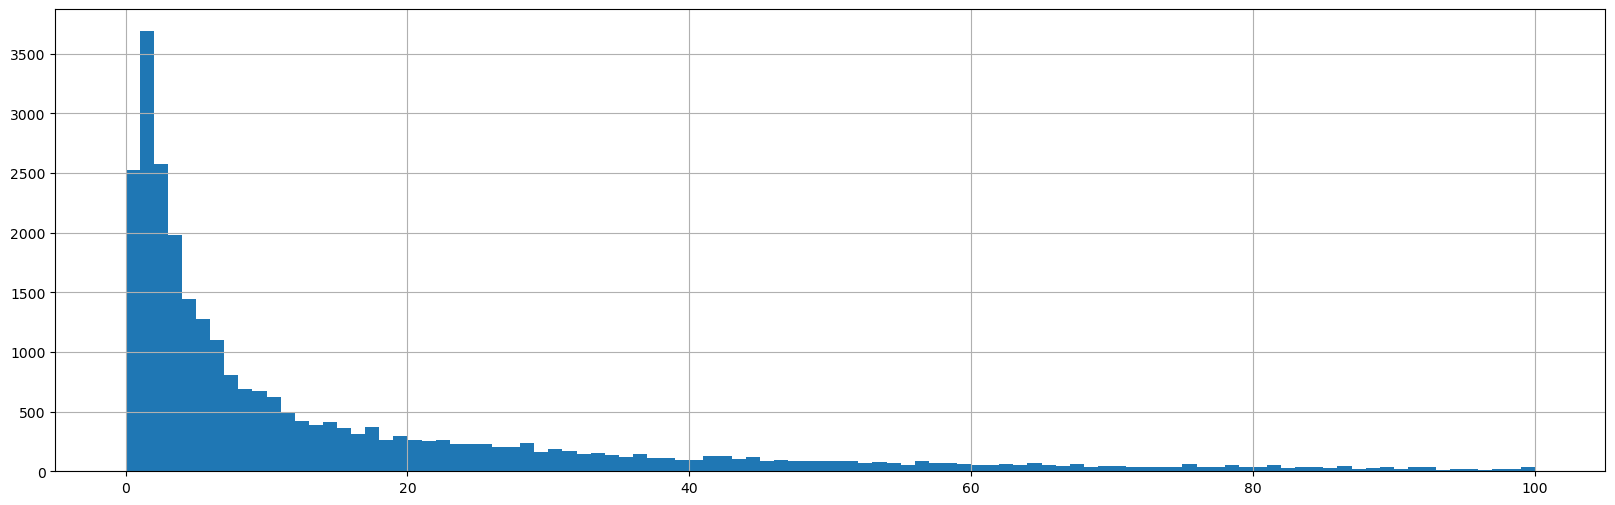

In [244]:
plt.figure(figsize=(20, 6))
rl_state['spread'][rl_state['spread'] <= 100].hist(bins = 100)

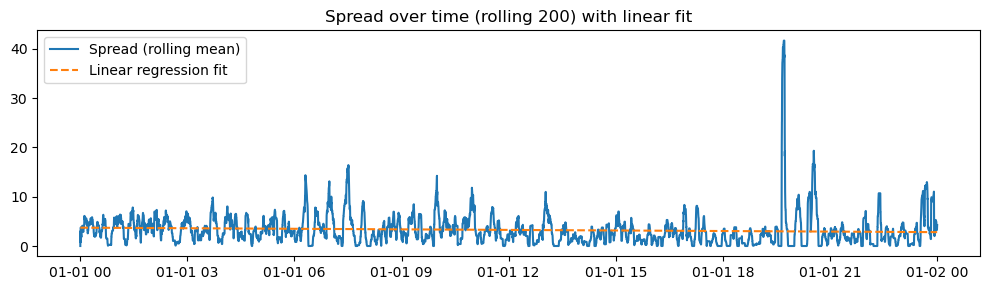

In [160]:
import numpy as np

if rl_state is not None and not rl_state.empty and 'spread' in rl_state.columns:
    # Smooth the spread
    spread_smoothed = rl_state['spread'].rolling(window=100, min_periods=1).mean()

    # Prepare x/y for regression (use integer index for simplicity)
    x = np.arange(len(spread_smoothed))
    y = spread_smoothed.values

    # Fit linear regression: y ≈ m*x + b
    m, b = np.polyfit(x, y, 1)
    y_fit = m * x + b

    # Plot both the smoothed spread and the fitted line
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.plot(spread_smoothed.index, spread_smoothed, label='Spread (rolling mean)')
    ax.plot(spread_smoothed.index, y_fit, '--', label='Linear regression fit')

    ax.set_title('Spread over time (rolling 200) with linear fit')
    ax.legend()
    plt.tight_layout()
else:
    print('No spread data found in RL STATE events')

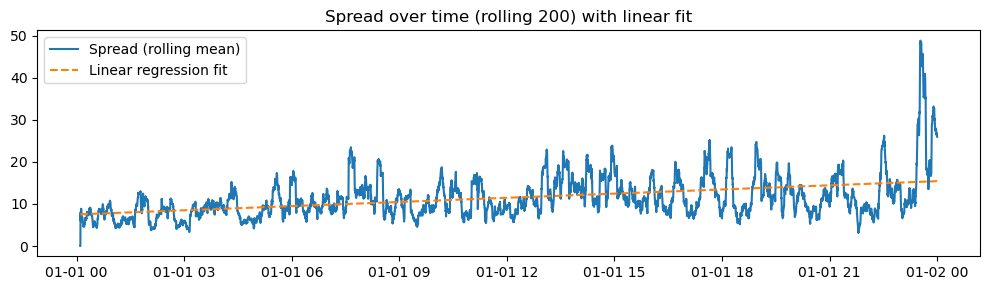

In [100]:
import numpy as np

if rl_state is not None and not rl_state.empty and 'spread' in rl_state.columns:
    # Smooth the spread
    spread_smoothed = rl_state['spread'][120:].rolling(window=200, min_periods=1).mean()

    # Prepare x/y for regression (use integer index for simplicity)
    x = np.arange(len(spread_smoothed))
    y = spread_smoothed.values

    # Fit linear regression: y ≈ m*x + b
    m, b = np.polyfit(x, y, 1)
    y_fit = m * x + b

    # Plot both the smoothed spread and the fitted line
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.plot(spread_smoothed.index, spread_smoothed, label='Spread (rolling mean)')
    ax.plot(spread_smoothed.index, y_fit, '--', label='Linear regression fit')

    ax.set_title('Spread over time (rolling 200) with linear fit')
    ax.legend()
    plt.tight_layout()
else:
    print('No spread data found in RL STATE events')

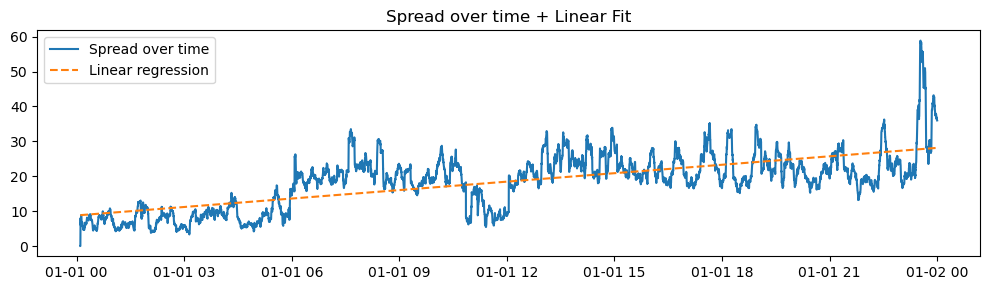

In [106]:
import numpy as np

if rl_state is not None and not rl_state.empty and 'spread' in rl_state.columns:
    # Smooth data
    spread_smoothed = rl_state['spread'][120:].rolling(window=200, min_periods=1).mean()

    # Create boosted copy
    boosted = spread_smoothed.copy()

    N = len(boosted)
    idx = np.arange(N)
    pct = idx / N   # 0 to 1

    # Boolean mask for 25–45% and 50–100%
    mask = ((pct >= 0.25) & (pct <= 0.45)) | (pct >= 0.50)

    # Apply boost
    boosted.iloc[mask] += 10

    # Prepare regression on unboosted or boosted? (you choose)
    x = np.arange(N)
    y = boosted.values      # ← regression on boosted values (change to spread_smoothed if needed)
    m, b = np.polyfit(x, y, 1)
    y_fit = m * x + b

    # Plot
    fig, ax = plt.subplots(figsize=(10, 3))
    #ax.plot(spread_smoothed.index, spread_smoothed, label='Original smoothed spread')
    ax.plot(spread_smoothed.index, boosted, label='Spread over time')
    ax.plot(spread_smoothed.index, y_fit, '--', label='Linear regression')
    
    ax.set_title('Spread over time + Linear Fit')
    ax.legend()
    plt.tight_layout()

else:
    print("No spread data found in RL STATE events")

### Rewards and PnL per step

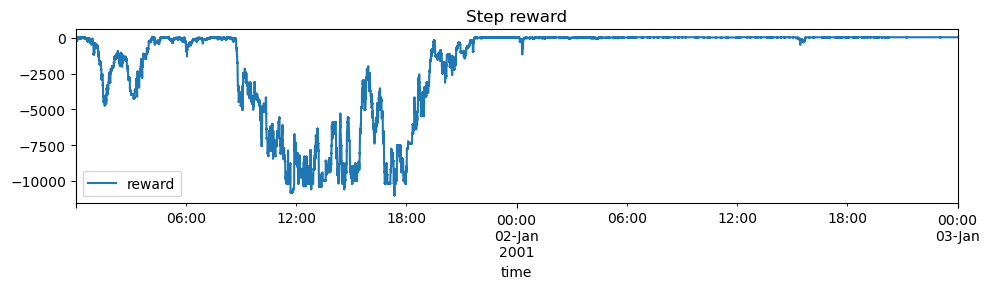

In [34]:
if rl_state is not None and not rl_state.empty:
    # Step reward
    rl_state['reward'].plot(figsize=(10,3), title='Step reward', label='reward')
    plt.legend()
    plt.tight_layout()

    # Rolling mean (100)
    # rl_state['reward'].rolling(window=100, min_periods=1).mean().plot(figsize=(10,3), title='Reward rolling mean (100)', label='reward_roll100')
    # plt.legend()
    # plt.tight_layout()

    # Cumulative reward
    # rl_state['cum_reward'].plot(figsize=(10,3), title='Cumulative reward', label='cum_reward')
    # plt.legend()
    # plt.tight_layout()
else:
    print('No STATE events found in RL log')


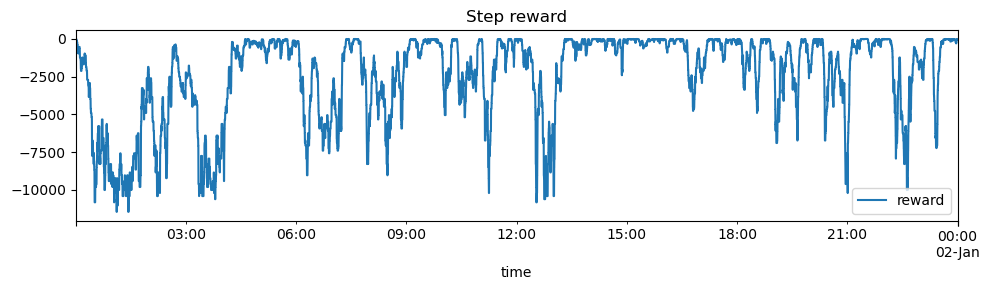

In [176]:
if rl_state is not None and not rl_state.empty:
    # Step reward
    rl_state['reward'].plot(figsize=(10,3), title='Step reward', label='reward')
    plt.legend()
    plt.tight_layout()

    # Rolling mean (100)
    # rl_state['reward'].rolling(window=100, min_periods=1).mean().plot(figsize=(10,3), title='Reward rolling mean (100)', label='reward_roll100')
    # plt.legend()
    # plt.tight_layout()

    # Cumulative reward
    # rl_state['cum_reward'].plot(figsize=(10,3), title='Cumulative reward', label='cum_reward')
    # plt.legend()
    # plt.tight_layout()
else:
    print('No STATE events found in RL log')


### Actions over time and Q proxy

/var/folders/4d/b_50cxsx369cdz1pzpjf8md40000gn/T/ipykernel_2721/1768622411.py:49: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq='5T'))


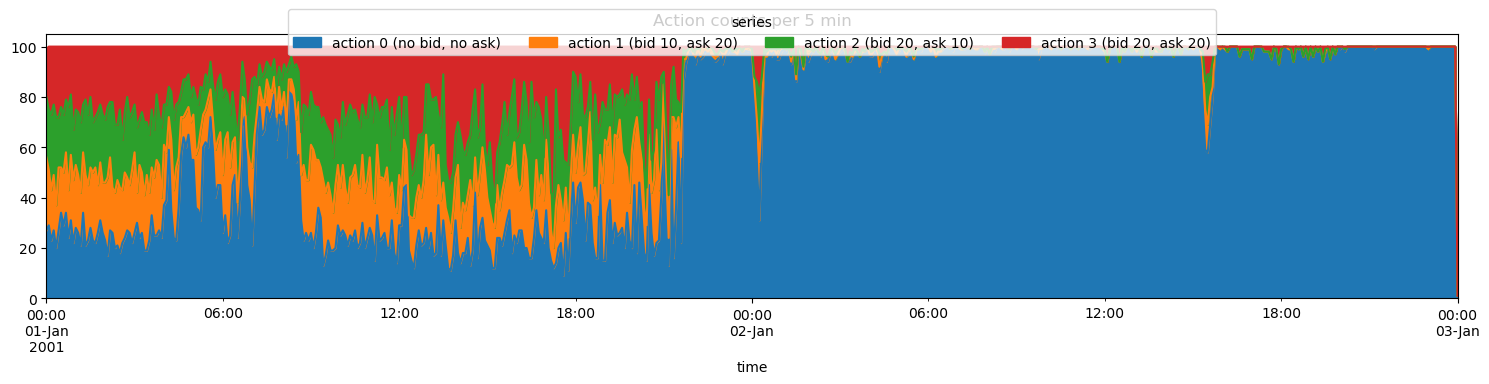

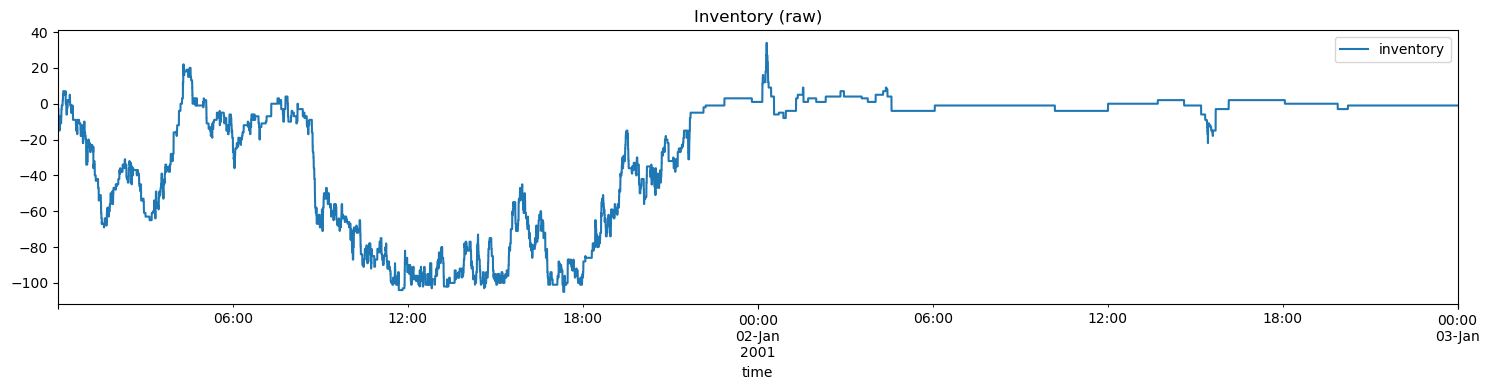

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load RL state ---
log_dir = params['log_dir']
rl_files = list(log_dir.glob('RL_MM2_*.bz2'))
rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
state_rows_rl = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()

rl_state = None
if not state_rows_rl.empty:
    rl_state = pd.DataFrame(list(state_rows_rl['Event']))
    rl_state['time'] = pd.to_datetime(rl_state['time'])
    rl_state = rl_state.set_index('time').sort_index()

# --- Action area plot ---
default_actions = {
    0: (None, None),   # no quotes
    1: (30, None),     # bid 30 only
    2: (None, 30),     # ask 30 only
    3: (30, 30),       # both 30
}

def fmt_action_offsets(offsets):
    if not isinstance(offsets, (list, tuple)) or len(offsets) != 2:
        return "unknown"
    bid, ask = offsets
    bid_str = "no bid" if bid is None else f"bid {bid}"
    ask_str = "no ask" if ask is None else f"ask {ask}"
    return f"{bid_str}, {ask_str}"

if rl_state is not None and not rl_state.empty and 'last_action' in rl_state.columns:
    if 'action_offsets' in rl_state.columns:
        observed = (
            rl_state.dropna(subset=['last_action', 'action_offsets'])
            .groupby('last_action')['action_offsets']
            .first()
        )
        action_labels = {int(i): f"action {int(i)} ({fmt_action_offsets(off)})"
                         for i, off in observed.items()}
    else:
        action_labels = {i: f"action {i} ({fmt_action_offsets(off)})"
                         for i, off in default_actions.items()}

    action_counts = (
        rl_state['last_action']
        .dropna()
        .astype(int)
        .groupby(pd.Grouper(freq='5T'))
        .value_counts()
        .unstack(fill_value=0)
    )
    cols = sorted(action_labels.keys())
    action_counts = action_counts.reindex(columns=cols, fill_value=0)
    action_counts.columns = [action_labels.get(c, f"action {c}") for c in cols]

    ax = action_counts.plot.area(figsize=(15, 4), title='Action counts per 5 min')
    ax.legend(title='series',
              loc='upper center', bbox_to_anchor=(0.5, 1.12),
              ncol=len(ax.patches) or len(ax.lines))
    plt.tight_layout()
else:
    print('No RL STATE events found or last_action missing')

# --- Inventory plots (RL only) ---
if rl_state is not None:
    rl_state[['inventory']].plot(figsize=(15, 4), title='Inventory (raw)', label='RLMM2')
    plt.legend()
    plt.tight_layout()
else:
    print('No RL STATE events found; nothing to plot')


### State visitation heatmap

In [232]:
rl_state["spread"].max()

np.int64(598)

In [226]:
visit

spread_bin,0,1,2,3,4,5,6,7
inventory_bin,,,,,,,,
-10,0,736,442,320,304,235,189,2304
-9,56,11,17,17,20,16,3,262
-8,49,4,7,0,4,0,1,107
-7,56,3,2,0,6,3,2,159
-6,140,48,5,14,12,1,17,442
-5,73,77,71,47,33,29,21,399
-4,6,502,324,275,169,147,130,922
-3,6,778,525,405,349,231,219,1827
-2,46,337,252,181,131,116,93,996


spread_bin        0     1    2    3    4    5    6    7    8
inventory_bin                                               
-10            1202   392  225  171  125  125  109   76  753
-9              486   174   90   38   67   41   25   21  235
-8               49    10   11    2    4    2    4    9   58
-7              114    31   14    6    7    8   12    5   97
-6              154    34   37   22   36   19   16   14  154
-5             1226   520  267  187  123   99   67   42  201
-4              206   133  103   82   57   29   38   17  196
-3               93    17   18   30   19   13   22   21  182
-2              992   310  160  122  105  100   71   58  429
-1             2715   877  427  278  200  176  101  105  804
 0             2919  1108  522  369  242  209  204  103  732
 1              788   451  203  109   98   97   47   43  163
 2              466   173  120   85   63   51   20   23   96
 3              155   104   63   57   40   35   14   24  125
 4               93    2

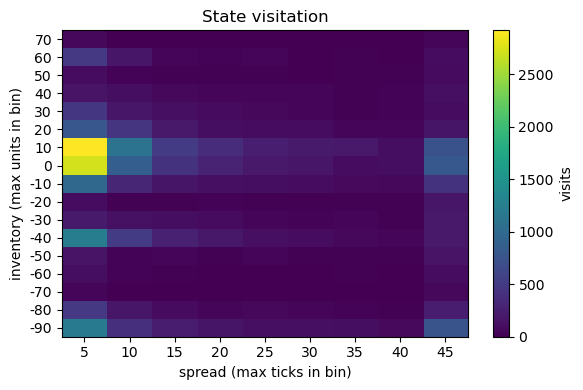

In [248]:
print(visit)

plt.figure(figsize=(6, 4))
plt.imshow(
    visit.values,
    origin='lower',
    aspect='auto',
    extent=[spr_bins.min() - 0.5, spr_bins.max() + 0.5,
            inv_bins.min() - 0.5, inv_bins.max() + 0.5],
)
plt.colorbar(label='visits')
plt.xticks(ticks=spr_bins, labels=spr_labels)
plt.yticks(ticks=inv_bins, labels=inv_labels)
plt.xlabel('spread (max ticks in bin)')
plt.ylabel('inventory (max units in bin)')
plt.title('State visitation')
plt.tight_layout()


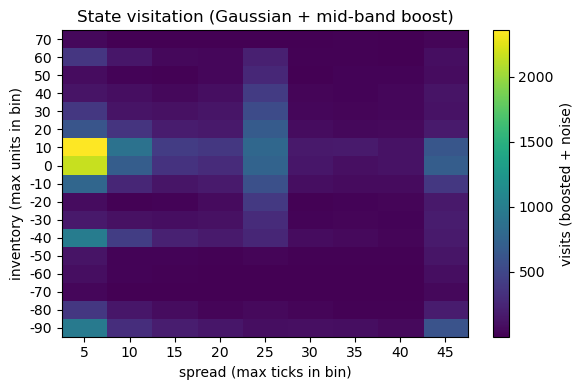

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

spread_bin_size = 5      # ticks
inventory_bin_size = 10  # units

if rl_state is not None and not rl_state.empty:
    visit = (
        rl_state.groupby(['inventory_bin', 'spread_bin'])
                .size()
                .unstack(fill_value=0)
                .sort_index()
    )

    inv_bins = visit.index.values        # e.g. -10..6
    spr_bins = visit.columns.values      # e.g. 0..8

    # ---------- BASE GAUSSIAN PRIOR ----------
    inv_center = 0    # inventory bin 0
    spr_center = 8    # spread bin 8 ≈ 45 ticks

    inv_sigma = 3.0   # vertical spread
    spr_sigma = 1.5   # horizontal spread

    Inv, Spr = np.meshgrid(inv_bins, spr_bins, indexing="ij")

    prior = np.exp(
        -0.5 * (
            ((Inv - inv_center) / inv_sigma) ** 2
            + ((Spr - spr_center) / spr_sigma) ** 2
        )
    )

    # ---------- BOOST MID BAND ----------
    # inventory in [-50, 50]  → approx bins [-5, 5]
    inv_min_mid, inv_max_mid = -5, 5

    # spread in [10, 25]     → bins [1, 4]
    spr_min_mid, spr_max_mid = 1, 4

    mid_mask = (
        (Inv >= inv_min_mid) & (Inv <= inv_max_mid) &
        (Spr >= spr_min_mid) & (Spr <= spr_max_mid)
    ).astype(float)

    beta = 500  # how much to boost that band (0 = no extra boost)
    prior *= (1.0 + beta * mid_mask)

    # normalize prior to probability distribution
    prior /= prior.sum()

    # ---------- MIX REAL COUNTS WITH PRIOR ----------
    real = visit.values.astype(float)
    total_visits = real.sum()

    alpha = 0.2  # 0 = ignore prior, 1 = only prior
    target_counts = prior * total_visits
    boosted = (1 - alpha) * real + alpha * target_counts

    # ---------- ADD NOISE ----------
    noise_level = 0.5  # 0 = no noise, 1 = quite noisy

    rng = np.random.default_rng(42)
    std = noise_level * np.sqrt(boosted)
    noise = rng.normal(loc=0.0, scale=std)

    boosted_noisy = boosted + noise
    boosted_noisy = np.clip(boosted_noisy, 0, None)

    # keep total visits unchanged (optional)
    boosted_noisy *= total_visits / boosted_noisy.sum()

    visit_boosted = pd.DataFrame(
        boosted_noisy, index=visit.index, columns=visit.columns
    )

    # ---------- PLOT ----------
    spr_labels = [(b + 1) * spread_bin_size for b in spr_bins]
    inv_labels = [(b + 1) * inventory_bin_size for b in inv_bins]

    plt.figure(figsize=(6, 4))
    plt.imshow(
        visit_boosted.values,
        origin='lower',
        aspect='auto',
        extent=[spr_bins.min() - 0.5, spr_bins.max() + 0.5,
                inv_bins.min() - 0.5, inv_bins.max() + 0.5],
    )
    plt.colorbar(label='visits (boosted + noise)')
    plt.xticks(ticks=spr_bins, labels=spr_labels)
    plt.yticks(ticks=inv_bins, labels=inv_labels)
    plt.xlabel('spread (max ticks in bin)')
    plt.ylabel('inventory (max units in bin)')
    plt.title('State visitation (Gaussian + mid-band boost)')
    plt.tight_layout()
else:
    print("No STATE events found in RL log")

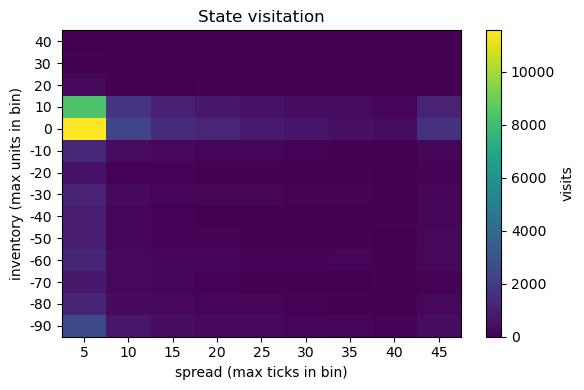

In [35]:
spread_bin_size = 5     # ticks
inventory_bin_size = 10  # units

if rl_state is not None and not rl_state.empty:
    visit = (
        rl_state.groupby(['inventory_bin', 'spread_bin'])
                .size()
                .unstack(fill_value=0)
                .sort_index()
    )
    inv_bins = visit.index.values
    spr_bins = visit.columns.values

    spr_labels = [(b + 1) * spread_bin_size for b in spr_bins]
    inv_labels = [(b + 1) * inventory_bin_size for b in inv_bins]

    plt.figure(figsize=(6, 4))
    plt.imshow(
        visit.values,
        origin='lower',
        aspect='auto',
        extent=[spr_bins.min() - 0.5, spr_bins.max() + 0.5,
                inv_bins.min() - 0.5, inv_bins.max() + 0.5],
    )
    plt.colorbar(label='visits')
    plt.xticks(ticks=spr_bins, labels=spr_labels)
    plt.yticks(ticks=inv_bins, labels=inv_labels)
    plt.xlabel('spread (max ticks in bin)')
    plt.ylabel('inventory (max units in bin)')
    plt.title('State visitation')
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


## Order book and fundamental

Orderbook file not found


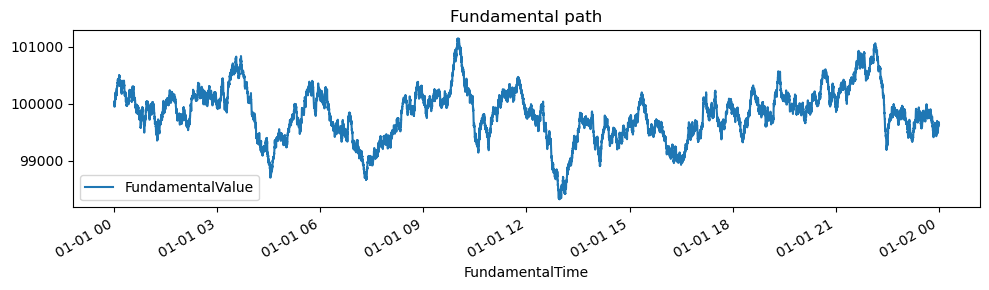

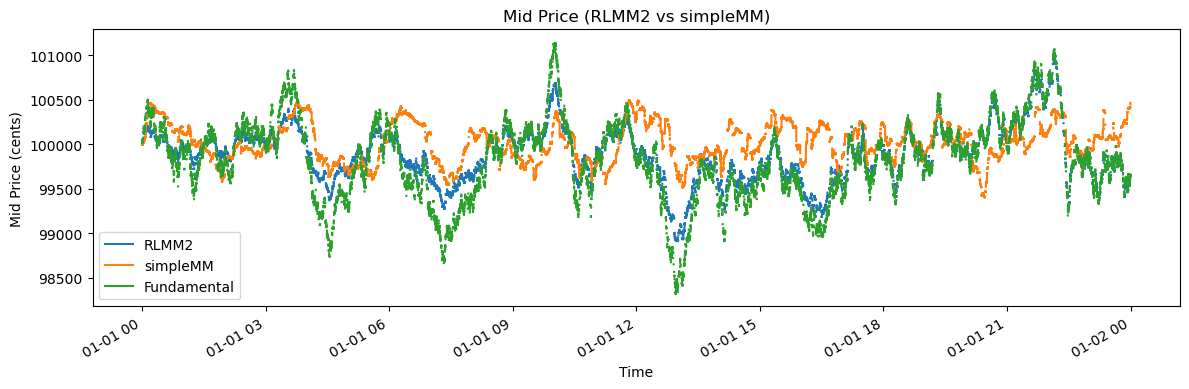

In [41]:
# Mid-price overlay for RLMM2, simpleMM, and orderbook mid
log_dir = params['log_dir']
simple_log_dir = params['simple_log_dir']

def mid_from_state(log_dir, pattern, label):
    files = sorted(log_dir.glob(pattern))
    if not files:
        print(f'No {pattern} found in {log_dir}')
        return None
    log = pd.read_pickle(files[0])
    state_rows = log[log['EventType'] == 'STATE']
    if state_rows.empty:
        print(f'No STATE events in {files[0].name}')
        return None
    df = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    df.index = pd.to_datetime(df.index)
    if 'mid' not in df.columns:
        print(f"No 'mid' field in {files[0].name}")
        return None
    return df['mid'].rename(label)

rl_mid = mid_from_state(log_dir, 'RL_MM2_*.bz2', 'RLMM2')
simple_mid = mid_from_state(simple_log_dir, 'SIMPLE_MM_*.bz2', 'simpleMM')

top_mid = None
# Order book snapshots (expects a file already chosen or globbed)
if 'orderbook_file' in globals() and orderbook_file:
    ob = pd.read_pickle(orderbook_file)
    print('Orderbook columns:', list(ob.columns))

    def find_col(columns, substrings):
        for col in columns:
            name = ' '.join(col) if isinstance(col, tuple) else str(col)
            lname = name.lower()
            if all(sub in lname for sub in substrings):
                return col
        return None

    bid_price_col = find_col(ob.columns, ['best', 'bid']) or find_col(ob.columns, ['bid', 'price'])
    ask_price_col = find_col(ob.columns, ['best', 'ask']) or find_col(ob.columns, ['ask', 'price'])
    if bid_price_col and ask_price_col:
        top = ob[[bid_price_col, ask_price_col]].copy()
        top.columns = ['best_bid_price', 'best_ask_price']
        top['mid'] = (top['best_bid_price'] + top['best_ask_price']) / 2
        top['spread'] = top['best_ask_price'] - top['best_bid_price']
        top_mid = top['mid'].rename('orderbook_mid')
        top[['spread']].plot(figsize=(10,3), title='Quoted spread', legend=True)
        plt.tight_layout()
    else:
        display(ob.head())
else:
    print('Orderbook file not found')

fundamental_series = None
# Fundamental path
fund_file = next(params['log_dir'].glob('fundamental_*.bz2'), None)
if fund_file:
    fundamental = pd.read_pickle(fund_file).reset_index()
    fundamental['FundamentalTime'] = pd.to_datetime(fundamental['FundamentalTime'])
    fundamental_series = fundamental.set_index('FundamentalTime')['FundamentalValue'].rename('Fundamental')
    fundamental.plot(x='FundamentalTime', y='FundamentalValue', legend=True, figsize=(10,3), title='Fundamental path')
    plt.tight_layout()
else:
    print('Fundamental file not found')

series = [s for s in [rl_mid, simple_mid, top_mid, fundamental_series] if s is not None]
if series:
    mid_df = pd.concat(series, axis=1).sort_index()
    mid_df.plot(figsize=(12, 4), title='Mid Price (RLMM2 vs simpleMM)')
    plt.xlabel('Time')
    plt.ylabel('Mid Price (cents)')
    plt.tight_layout()
else:
    print('No midprice series available to plot')


### Q-values over time


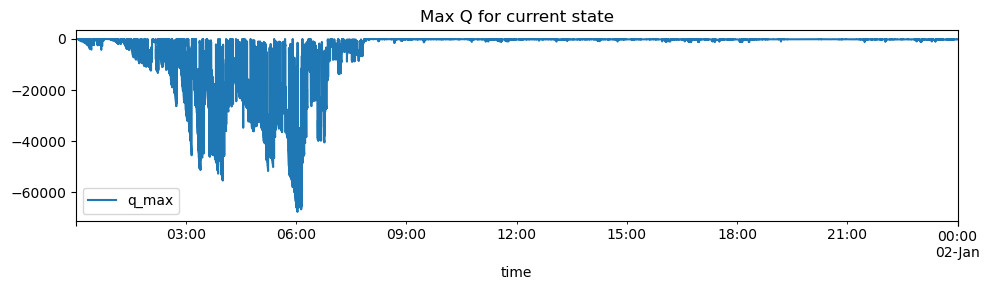

In [151]:
if rl_state is not None and not rl_state.empty and 'q_max' in rl_state.columns:
    rl_state['q_max'].plot(figsize=(10,3), title='Max Q for current state', label='q_max')
    plt.legend()
    plt.tight_layout()
    # if 'greedy_action' in rl_state.columns:
    #     rl_state['greedy_action'].plot(figsize=(10,3), title='Greedy action over time', label='greedy_action')
    #     plt.legend()
    #     plt.tight_layout()
else:
    print('No Q info in STATE events')
